In [1]:
import os # for working with directories and files
import numpy as np # numpy for arrays/tensors
import matplotlib.pyplot as plt # pyplot for drawing graphs
import tensorflow as tf # tensorflow for neural network
from tensorflow import keras # keras for ease of use
from keras.callbacks import EarlyStopping, ModelCheckpoint # some useful callbacks
from sklearn.metrics import confusion_matrix # some useful metrics

In [4]:
# todo fill these with arv/rms/alt values and gesture labels
train, train_labels = None, None 
valid, valid_labels = None, None
test, test_labels = None, None

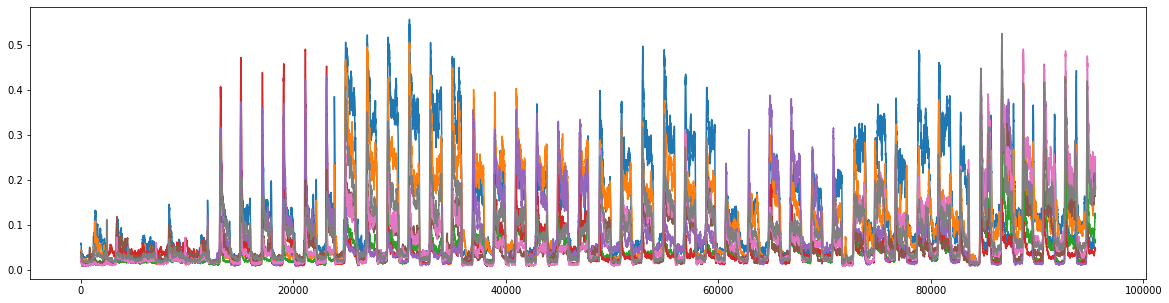

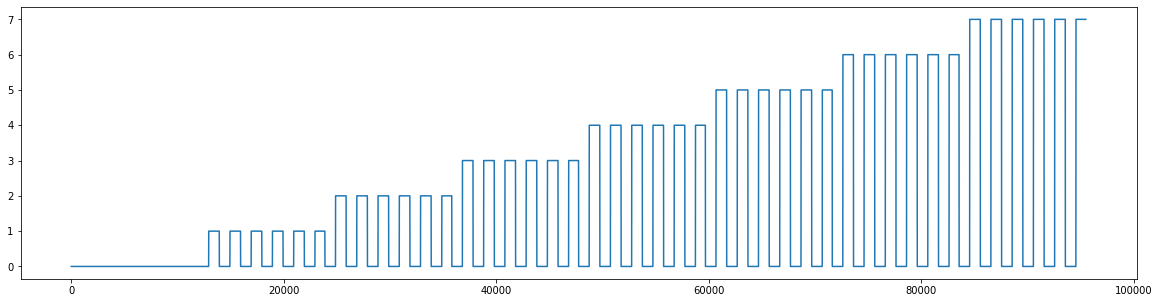

In [6]:
# plot what we got visually
plt.figure()
plt.plot(train)
plt.figure()
plt.plot(train_labels)

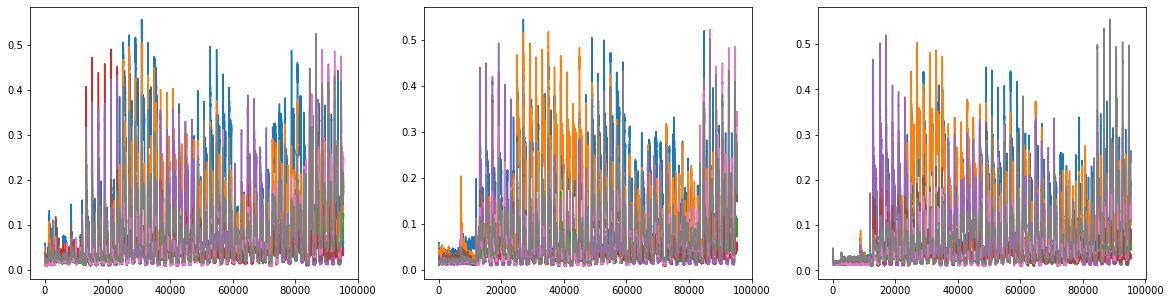

In [7]:
# a little visual comparison
fig, ax = plt.subplots(1, 3)
ax[0].plot(train)
ax[1].plot(valid)
ax[2].plot(test)

In [8]:
# set hyperparameters of the neural network
model = keras.Sequential([
    # first hidden layer, try diffrent number of perceptrons (100 here)
    keras.layers.Dense(100, activation = "relu", input_shape = (8,)), # 8 arv/rms/alt channels on the input
    keras.layers.Dense(30, activation = "relu"), #second hidden layer
    # add more hidden layers???
    keras.layers.Dense(8, activation = "sigmoid") # output layer, 8 gestures
])
opt = keras.optimizers.Adam(learning_rate = 0.001) # maybe a bit too high??
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer = opt, loss = loss, metrics = ["accuracy"])

In [9]:
# save best weights to avoid overfitting
model_checkpoint = ModelCheckpoint("weights.h5", save_best_only = True, save_weights_only = True)
# stopping criterion
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
# actual training
history = model.fit(train, train_labels, 
                    validation_data = (valid, valid_labels), 
                    epochs = 20, # depends on hyperparameters
                    callbacks = [early_stopping, model_checkpoint]) # very important!
# load best weights
model.load_weights("weights.h5")

Epoch 1/20
2984/2984 [==============================] - 5s 2ms/step - loss: 0.5669 - accuracy: 0.8440 - val_loss: 0.6902 - val_accuracy: 0.7926
Epoch 2/20
2984/2984 [==============================] - 5s 2ms/step - loss: 0.2380 - accuracy: 0.9295 - val_loss: 0.7845 - val_accuracy: 0.7999
Epoch 3/20
2984/2984 [==============================] - 5s 2ms/step - loss: 0.2092 - accuracy: 0.9379 - val_loss: 0.9622 - val_accuracy: 0.7752
Epoch 4/20
2984/2984 [==============================] - 5s 2ms/step - loss: 0.1883 - accuracy: 0.9434 - val_loss: 1.1737 - val_accuracy: 0.7579
Epoch 5/20
2984/2984 [==============================] - 4s 1ms/step - loss: 0.1676 - accuracy: 0.9480 - val_loss: 1.1754 - val_accuracy: 0.7613
Epoch 6/20
2984/2984 [==============================] - 4s 1ms/step - loss: 0.1610 - accuracy: 0.9496 - val_loss: 1.3734 - val_accuracy: 0.7509


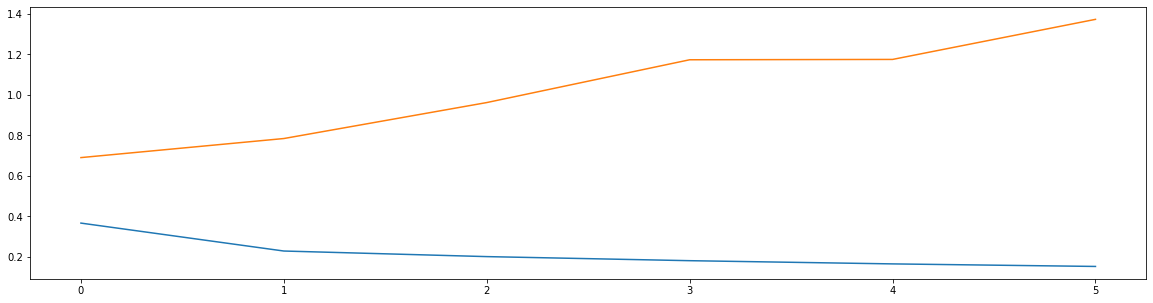

In [10]:
# observe the loss metric on both the training (blue) and validation (orange) set
# what do we noice?
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

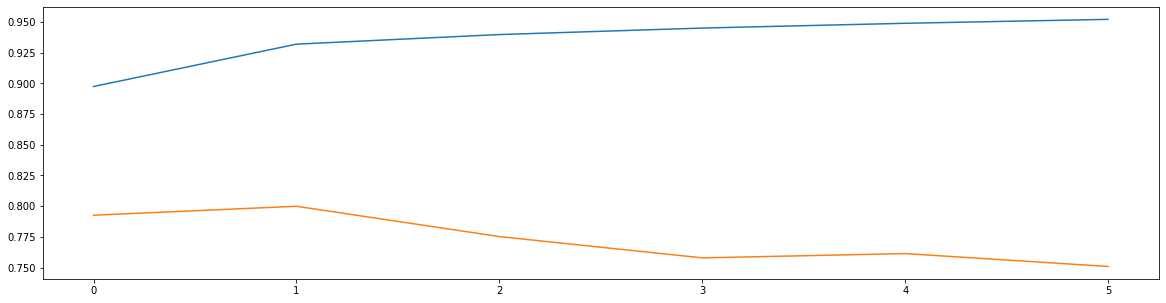

In [11]:
# same thing for accuracy (notice the similiarty/symmetry with loss)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [12]:
# now to evaluate our model!
model.evaluate(test, test_labels)

2983/2983 [==============================] - 2s 587us/step - loss: 0.6487 - accuracy: 0.77720s - loss: 0.5216 - ac


[0.6486930847167969, 0.7772096991539001]

In [13]:
# predictions for additinal analysis
predictions = model.predict(test)

In [14]:
# confusion matrix
predicted_labels = np.argmax(predictions, axis=1)
conf = confusion_matrix(test_labels, predicted_labels, normalize="pred") # normalize pred! explain why?
conf

array([[7.91177164e-01, 8.23392975e-02, 7.53350235e-02, 1.91451862e-01,
        6.66430344e-02, 1.12097151e-01, 6.80713128e-02, 1.67810831e-02],
       [5.85043642e-03, 9.14512922e-01, 0.00000000e+00, 2.42344129e-03,
        0.00000000e+00, 3.42519072e-03, 0.00000000e+00, 0.00000000e+00],
       [5.20877565e-02, 0.00000000e+00, 9.24664976e-01, 0.00000000e+00,
        1.25841900e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.87536369e-03, 0.00000000e+00, 0.00000000e+00, 6.15333774e-01,
        0.00000000e+00, 5.91623852e-03, 0.00000000e+00, 0.00000000e+00],
       [1.91869152e-02, 2.98210736e-03, 0.00000000e+00, 0.00000000e+00,
        8.14073024e-01, 1.71259536e-03, 1.41004862e-01, 3.05110603e-03],
       [5.44153495e-03, 1.65672631e-04, 0.00000000e+00, 1.90790923e-01,
        0.00000000e+00, 6.00186829e-01, 0.00000000e+00, 0.00000000e+00],
       [5.44625305e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.83126551e-02, 2.57667757e-01, 7.90923825e-01, 0.

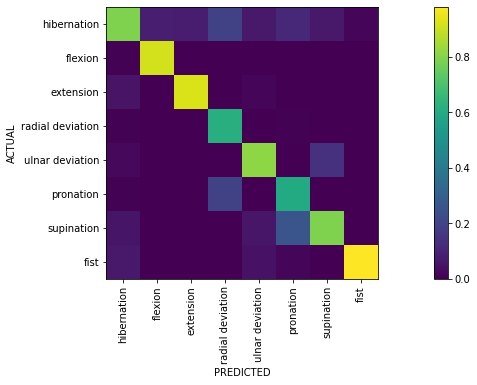

In [16]:
# visualise confusion matrix
legend = ["hibernation", "flexion", "extension", "radial deviation", "ulnar deviation", "pronation", "supination", "fist"]
plt.imshow(conf)
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.yticks(np.arange(len(legend)), legend)
plt.xticks(np.arange(len(legend)), legend, rotation='vertical')
plt.colorbar()